Data Processing

In [82]:
%matplotlib inline

In [83]:
import sys
import os
sys.path.append(os.path.abspath('.'))

In [84]:
from pages.A_Explore_Preprocess_Dataset import load_dataset
filepath = "Loan_default.csv"
df = load_dataset(filepath)
df.head()

2025-05-12 10:53:12.452 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 10:53:12.453 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [85]:
import numpy as np
# print basic statistics about dataset - number of features, distribution of target variable
print(f"Number of rows: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print(f"Number of numeric features: {len(numeric_cols)}")
print(f"Number of categorical features: {len(categorical_cols)}")

num_rows_with_missing = df.isnull().any(axis=1).sum()
print(f"% of rows with missing values: {num_rows_with_missing/df.shape[0] * 100:.2f}%")

print("Counts of 0 and 1:", df['Default'].value_counts())

Number of rows: 255347
Number of features: 18
Number of numeric features: 10
Number of categorical features: 8
% of rows with missing values: 0.00%
Counts of 0 and 1: Default
0    225694
1     29653
Name: count, dtype: int64


In [86]:
# scale numeric features
features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']
for f in features:
    df[f] = (df[f] - df[f].mean()) / df[f].std()
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,0.833988,0.089693,-1.086831,-0.341492,0.590532,1.341934,0.261771,-0.001526,-0.260752,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,1.701218,-0.823019,-0.044309,-0.731665,-1.285729,-1.343789,-1.308347,1.412790,0.778584,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,0.166888,0.043854,0.022715,-0.775716,-0.968208,0.446693,1.156829,-0.708684,-0.823726,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,-0.767052,-1.303449,-1.168535,1.061873,-1.718712,0.446693,-0.967804,-0.708684,-1.170172,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,1.100828,-1.592852,-1.671918,0.369630,-1.487787,1.341934,-1.052186,0.705632,0.995112,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [87]:
# for each categorical column, print how many unique values it has

print(len(categorical_cols))
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts())
    print()

8
LoanID: 255347 unique values
LoanID
I38PQUQS96    1
WGB0GD3150    1
XATSFC5YHN    1
CQXDW5VBAG    1
6AIVUNAJG8    1
             ..
ZBK3GDL2LI    1
SP7XY2LPYA    1
Q2DO8ENMV1    1
5EXD8N4MT4    1
ZTH91CGL0B    1
Name: count, Length: 255347, dtype: int64

Education: 4 unique values
Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

EmploymentType: 4 unique values
EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64

MaritalStatus: 3 unique values
MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64

HasMortgage: 2 unique values
HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64

HasDependents: 2 unique values
HasDependents
Yes    127742
No     127605
Name: count, dtype: int64

LoanPurpose: 5 unique values
LoanPurpose
Business     51298
Home         51286
Education    51005
Other    

In [88]:
# balance classes (0 is overbalanced)
from sklearn.utils import resample
import pandas as pd

df_majority = df[df['Default'] == 0]
df_minority = df[df['Default'] == 1]

df_majority_downsampled = resample(
    df_majority,
    replace=False,                      # no bootstrapping
    n_samples=len(df_minority),         # match minority count
    random_state=42
)

df_balanced = pd.concat([df_majority_downsampled, df_minority])
df_balanced = df_balanced.sample(frac=1, random_state=42)  # shuffle

print("Class distribution after undersampling:")
print(df_balanced['Default'].value_counts())

df = df_balanced

Class distribution after undersampling:
Default
0    29653
1    29653
Name: count, dtype: int64


In [89]:
df = df.drop(columns="LoanID")
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
185575,-1.300732,-0.558692,0.572131,-1.373562,-0.015644,-0.448548,-0.405756,1.412790,1.341558,Master's,Part-time,Divorced,Yes,No,Home,Yes,0
127429,0.433728,0.981282,-1.383623,-1.203648,-1.516653,1.341934,0.938338,-1.415842,0.908501,Master's,Self-employed,Single,Yes,Yes,Other,Yes,1
210332,-0.433502,-0.078518,1.428757,0.149371,1.138977,0.446693,0.001089,-0.001526,-0.996949,Bachelor's,Self-employed,Married,No,No,Other,Yes,0
158865,-1.234022,-0.101848,-0.959051,0.023509,-1.718712,-1.343789,1.515454,1.412790,-0.000918,Bachelor's,Self-employed,Single,No,Yes,Home,Yes,1
248471,-1.700992,0.358999,0.786640,-1.134424,0.561667,-1.343789,0.481768,0.705632,-0.823726,Master's,Self-employed,Divorced,Yes,Yes,Home,Yes,0


In [90]:
from pages.A_Explore_Preprocess_Dataset import one_hot_encode_feature 
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df = one_hot_encode_feature(df, categorical_cols)

2025-05-12 10:53:39.373 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 10:53:39.374 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 10:53:39.376 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 10:53:39.377 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 10:53:39.377 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 10:53:39.377 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [91]:
print(df.columns)

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default',
       'Education_Bachelor's', 'Education_High School', 'Education_Master's',
       'Education_PhD', 'EmploymentType_Full-time', 'EmploymentType_Part-time',
       'EmploymentType_Self-employed', 'EmploymentType_Unemployed',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'HasMortgage_No', 'HasMortgage_Yes',
       'HasDependents_No', 'HasDependents_Yes', 'LoanPurpose_Auto',
       'LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home',
       'LoanPurpose_Other', 'HasCoSigner_No', 'HasCoSigner_Yes'],
      dtype='object')


In [92]:
features = [col for col in df.columns if col != 'Default']
X = df[features]
y = df['Default']

Modeling

In [146]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y.values, test_size=0.3, random_state=42
)

In [94]:
from pages.C_Test_Model import compute_accuracy, compute_precison_recall

def test_model(model, X_train, y_train, X_val, y_val):
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)

    train_acc = compute_accuracy(y_pred_train, y_train)
    train_precision, train_recall = compute_precison_recall(y_pred_train, y_train)

    val_acc = compute_accuracy(y_pred_val, y_val)
    val_precision, val_recall = compute_precison_recall(y_pred_val, y_val)

    print(f"Train accuracy: {train_acc * 100:.2f}%, Train precision: {train_precision * 100:.2f}%, Train recall: {train_recall * 100:.2f}%")
    print(f"Validation accuracy: {val_acc * 100:.2f}%, Validation precision: {val_precision * 100:.2f}%, Validation recall: {val_recall * 100:.2f}%")

In [159]:
from pages.B_Train_Model import LogisticRegression

log_model = LogisticRegression(learning_rate=.1, num_iterations=3000) # TODO: try diff learning rate, iterations
log_model.fit(X_train, y_train)

test_model(log_model, X_train, y_train, X_val, y_val)

2025-05-12 12:06:58.584 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 12:06:58.585 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 12:06:58.585 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 12:06:58.585 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 12:06:58.587 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 12:06:58.587 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 12:06:58.588 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 12:06:58.588 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

Train accuracy: 50.03%, Train precision: 0.00%, Train recall: 0.00%
Validation accuracy: 49.94%, Validation precision: 0.00%, Validation recall: 0.00%


In [139]:
from sklearn.linear_model import LogisticRegression as SkLogReg

baseline = SkLogReg(class_weight='balanced', max_iter=1000)
baseline.fit(X_train, y_train)
print("Sklearn model accuracy:", baseline.score(X_val, y_val))

Sklearn model accuracy: 0.6793502697841727


In [155]:
y_probs = baseline.predict(X_val)
print("Mean predicted prob:", np.mean(y_probs))
print("Min/max predicted prob:", np.min(y_probs), np.max(y_probs))

Mean predicted prob: 0.5092176258992805
Min/max predicted prob: 0 1


In [ ]:
from pages.B_Train_Model import NaiveBayes

bayes_model = NaiveBayes(classes=[0, 1], alpha = 2) # 0.1, 0.5, 1.0, and 2.0
bayes_model.fit(X_train, y_train)

test_model(bayes_model, X_train, y_train, X_val, y_val)

2025-05-12 10:55:06.438 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 10:55:06.439 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 10:55:06.439 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 10:55:06.439 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 10:55:06.440 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 10:55:06.441 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 10:55:06.441 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 10:55:06.441 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

Train accuracy: 49.09%, Train precision: 49.10%, Train recall: 48.05%
Validation accuracy: 49.12%, Validation precision: 49.05%, Validation recall: 48.55%


In [120]:
from pages.B_Train_Model import SVM

svm_model = SVM(learning_rate=0.001, num_iterations=1000, lambda_param=.01) # learning_rate=0.001, num_iterations=500, lambda_param=0.01 default params - tried huge range for both without successs
svm_model.fit(X_train, y_train)

test_model(svm_model, X_train, y_train, X_val, y_val)

2025-05-12 11:03:18.506 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 11:03:18.506 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 11:03:18.507 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 11:03:18.507 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 11:03:18.510 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 11:03:18.511 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 11:03:18.511 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 11:03:18.512 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

Train accuracy: 50.03%, Train precision: 50.03%, Train recall: 100.00%
Validation accuracy: 49.94%, Validation precision: 49.94%, Validation recall: 100.00%


Trying off the shelf more expressive/non-linear models as proof of concept

In [163]:
from pages.RandomForest import RandomForest

rf_model = RandomForest()
rf_model.fit(X_train, y_train)

test_model(rf_model, X_train, y_train, X_val, y_val)

InvalidIndexError: (slice(None, None, None), array([29, 12, 14, 10,  2]))

In [121]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

test_model(rf_model, X_train, y_train, X_val, y_val)

2025-05-12 11:06:47.711 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 11:06:47.712 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 11:06:47.713 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 11:06:47.713 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 11:06:47.713 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 11:06:47.714 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 11:06:47.714 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 11:06:47.714 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

Train accuracy: 100.00%, Train precision: 100.00%, Train recall: 100.00%
Validation accuracy: 67.20%, Validation precision: 67.40%, Validation recall: 66.47%


In [123]:
!pip install -q xgboost

In [124]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

test_model(xgb_model, X_train, y_train, X_val, y_val)

/opt/homebrew/Caskroom/miniforge/base/envs/paml-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [11:07:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
2025-05-12 11:07:30.095 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 11:07:30.096 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 11:07:30.096 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 11:07:30.096 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 11:07:30.097 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 11:07:30.097 Thread 'MainThread': missing ScriptRunContext! This warn

Train accuracy: 80.30%, Train precision: 80.17%, Train recall: 80.54%
Validation accuracy: 66.95%, Validation precision: 66.93%, Validation recall: 66.84%


Trying to do feature selection/mapping to check SVM

In [126]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

X_train_poly, X_val_poly, y_train, y_val = train_test_split(
    X_poly, y.values, test_size=0.3, random_state=42
)

svm_model = SVM(learning_rate=0.001, num_iterations=1000, lambda_param=.01)
svm_model.fit(X_train_poly, y_train)

test_model(svm_model, X_train_poly, y_train, X_val_poly, y_val)

2025-05-12 11:37:54.050 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 11:37:54.074 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 11:37:54.075 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 11:37:54.075 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 11:37:54.434 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 11:37:54.436 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 11:37:54.436 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 11:37:54.438 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

Train accuracy: 50.03%, Train precision: 50.03%, Train recall: 100.00%
Validation accuracy: 49.94%, Validation precision: 49.94%, Validation recall: 100.00%


In [118]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

selector = SelectKBest(mutual_info_classif, k=10)
X_new = selector.fit_transform(X, y)
X_new = pd.DataFrame(X_new, columns=selector.get_feature_names_out())
X_new.head()

,Age,Income,MonthsEmployed,InterestRate,HasMortgage_No,HasMortgage_Yes,HasDependents_No,HasDependents_Yes,HasCoSigner_No,HasCoSigner_Yes
0,-1.300732,-0.558692,-0.015644,-0.405756,0.0,1.0,1.0,0.0,0.0,1.0
1,0.433728,0.981282,-1.516653,0.938338,0.0,1.0,0.0,1.0,0.0,1.0
2,-0.433502,-0.078518,1.138977,0.001089,1.0,0.0,1.0,0.0,0.0,1.0
3,-1.234022,-0.101848,-1.718712,1.515454,1.0,0.0,0.0,1.0,0.0,1.0
4,-1.700992,0.358999,0.561667,0.481768,0.0,1.0,0.0,1.0,0.0,1.0


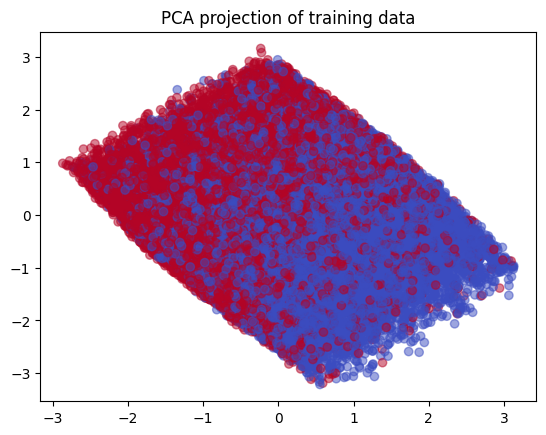

In [119]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_pca = PCA(n_components=2).fit_transform(X_new)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.title("PCA projection of training data")
plt.show()

In [ ]:
y_pred = svm_model.predict(X_train)
print("Unique predicted values:", np.unique(y_pred))

Unique predicted values: [1]


In [107]:
print("Train label distribution:", np.unique(y_train, return_counts=True))
print("Val label distribution:", np.unique(y_val, return_counts=True))

Train label distribution: (array([0, 1]), array([20746, 20768]))
Val label distribution: (array([0, 1]), array([8907, 8885]))


TODO: plot loss curves, plot AUC, plot precision-recall

In [39]:
!pip install -q matplotlib

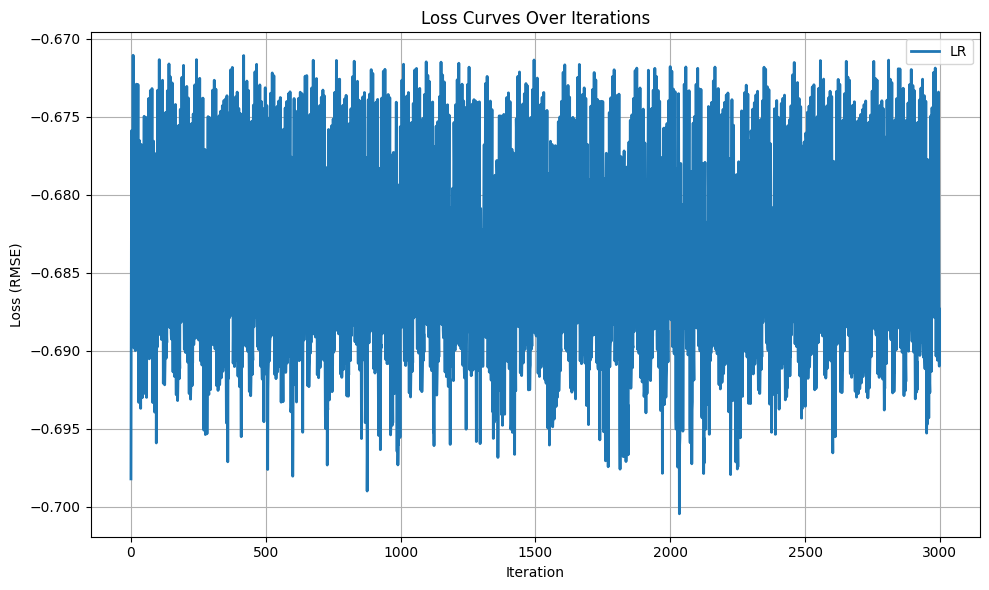

<Figure size 640x480 with 0 Axes>

In [157]:
# plot loss curves
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(log_model.likelihood_history, label='LR', linewidth=2)
# plt.plot(bayes_model.likelihood_history, label='NB', linestyle='--')
# plt.plot(svm_model.likelihood_history, label='SVM', linestyle=':')
plt.title('Loss Curves Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss (RMSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# save plot as image
plt.savefig('loss_curves.png', dpi=300)

TODO: cross val/grid search for best hyperparameter choices